In [85]:
%matplotlib notebook
import os

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from utils.mri_viewer import MRIViewer
from utils.data_utils import im_path_to_arr
from utils.config import Config
from utils.dice_score import dice_score
from models.fcn_concat import FCN_Concat

In [67]:
ex_path = '/local-scratch/romain_scratch/brats2017/train/'
patient = 'Brats17_2013_10_1'
patient_path = os.path.join(ex_path, patient)
label_path = os.path.join(patient_path, patient + '_seg.nii')
label = im_path_to_arr(label_path)
patient_path = patient_path.encode('utf-8')

In [32]:
os.listdir(ex_path)

['Brats17_CBICA_AOP_1',
 'Brats17_CBICA_AWG_1',
 'Brats17_CBICA_AVJ_1',
 'Brats17_TCIA_419_1',
 'Brats17_TCIA_282_1',
 'Brats17_CBICA_AQP_1',
 'Brats17_TCIA_425_1',
 'Brats17_TCIA_409_1',
 'Brats17_CBICA_AME_1',
 'Brats17_CBICA_AWH_1',
 'Brats17_TCIA_437_1',
 'Brats17_CBICA_AXL_1',
 'Brats17_TCIA_322_1',
 'Brats17_TCIA_375_1',
 'Brats17_CBICA_ABB_1',
 'Brats17_TCIA_147_1',
 'Brats17_TCIA_218_1',
 'Brats17_CBICA_AYU_1',
 'Brats17_2013_17_1',
 'Brats17_TCIA_462_1',
 'Brats17_TCIA_309_1',
 'Brats17_TCIA_221_1',
 'Brats17_CBICA_ATD_1',
 'Brats17_TCIA_192_1',
 'Brats17_TCIA_261_1',
 'Brats17_CBICA_ATV_1',
 'Brats17_TCIA_255_1',
 'Brats17_TCIA_630_1',
 'Brats17_CBICA_ASG_1',
 'Brats17_CBICA_AYW_1',
 'Brats17_TCIA_135_1',
 'Brats17_TCIA_186_1',
 'Brats17_TCIA_473_1',
 'Brats17_TCIA_265_1',
 'Brats17_TCIA_608_1',
 'Brats17_CBICA_AXN_1',
 'Brats17_TCIA_111_1',
 'Brats17_TCIA_152_1',
 'Brats17_CBICA_AXM_1',
 'Brats17_TCIA_621_1',
 'Brats17_TCIA_378_1',
 'Brats17_CBICA_ASE_1',
 'Brats17_TCIA_274_

In [17]:
config_path = 'config_files/fcn_train_concat_2017_v42.cfg'
config = Config(config_path)
model = FCN_Concat(config)

ValueError: Variable conv1/conv3d/kernel already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "/home/romains/romain/models/fcn_concat.py", line 58, in add_model
    kernel_regularizer=tf.nn.l2_loss)
  File "/home/romains/romain/models/fcn.py", line 22, in __init__
    self.add_model()
  File "<ipython-input-3-76ad32abc0dc>", line 3, in <module>
    model = FCN_Concat(config)


In [68]:
saver = tf.train.Saver()
conf = tf.ConfigProto()
conf.gpu_options.allow_growth = True
with tf.Session() as sess:
    saver.restore(sess, config.ckpt_path)
    pred = model.run_pred_single_example(sess, patient_path)
    pred[pred == 3] = 4

INFO:tensorflow:Restoring parameters from ckpt/fcn_brats_concat_2017_v42.ckpt


<IPython.core.display.Javascript object>


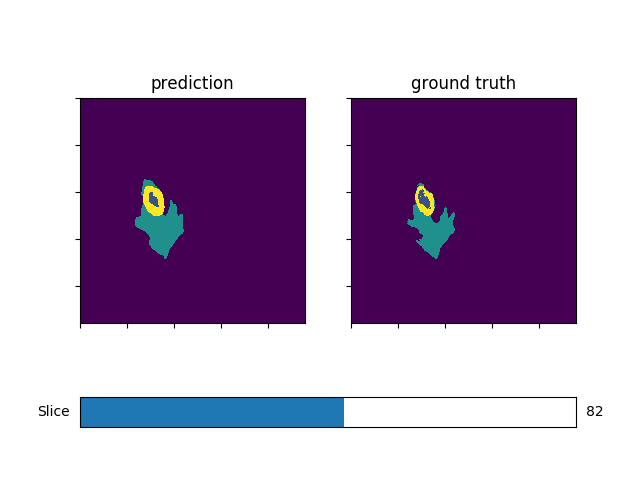

In [69]:
mr = MRIViewer(pred, label, cmap=None, title1='prediction', title2='ground truth')

In [70]:
def get_dice_scores(p, y):
    dice_whole = dice_score(y, pred)
    fpred_core = (p == 1) + (p == 4)
    fy_core = (y == 1) + (y == 4)
    dice_core = dice_score(fy_core, fpred_core)
    fpred_enhancing = p == 4
    fy_enhancing = y == 4
    dice_enhancing = dice_score(fy_enhancing, fpred_enhancing)
    print('whole: %f ... core: %f ... enhancing: %f ...'%(dice_whole, dice_core, dice_enhancing))

In [75]:
get_dice_scores(pred, label)

whole: 0.894028 ... core: 0.949889 ... enhancing: 0.850837 ...


In [77]:
# patient_path = patient_path.decode('utf-8')
flair_path = os.path.join(patient_path, patient + '_flair.nii')
flair = im_path_to_arr(flair_path)

<IPython.core.display.Javascript object>


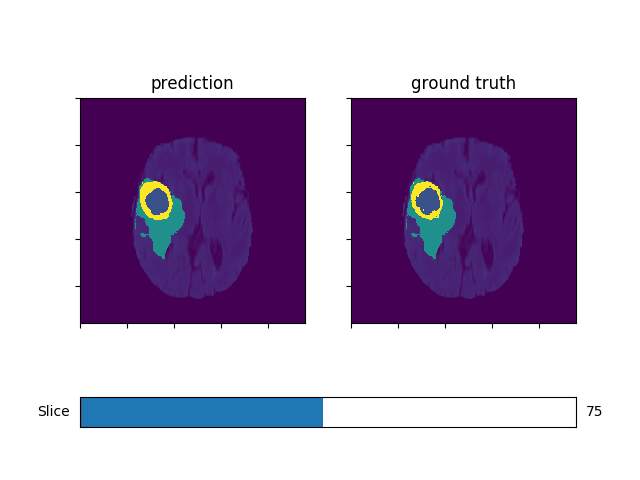

In [86]:
flair_pred = np.array(flair)
flair_label = np.array(flair)
flair_pred[pred == 1] = 1000
flair_pred[pred == 2] = 2000
flair_pred[pred == 4] = 4000
flair_label[label == 1] = 1000
flair_label[label == 2] = 2000
flair_label[label == 4] = 4000
MRIViewer(flair_pred, flair_label, cmap=None, title1='prediction', title2='ground truth')